In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [2]:
# Generate synthetic data
n_samples = 1000
n_features = 2
n_clusters = 4
random_state = 42

data, labels = make_blobs(
    n_samples=n_samples,
    n_features=n_features,
    centers=n_clusters,
    cluster_std=1.2,  # Controls cluster spread
    random_state=random_state
)

In [3]:
# Convert to a DataFrame for better manipulation
df = pd.DataFrame(data, columns=['Feature_1', 'Feature_2'])
df['True_Label'] = labels  # For evaluation purposes (if desired)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Feature_1', 'Feature_2']])
df_scaled = pd.DataFrame(scaled_data, columns=['Feature_1', 'Feature_2'])

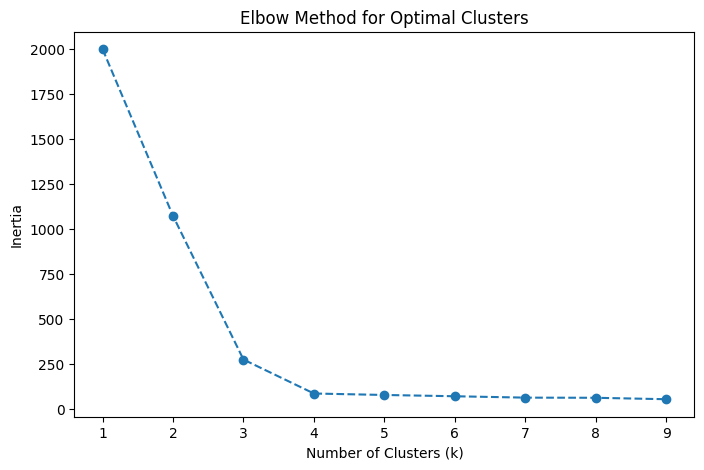

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [6]:
# Optimal clusters based on the elbow method (assume k=4 here)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

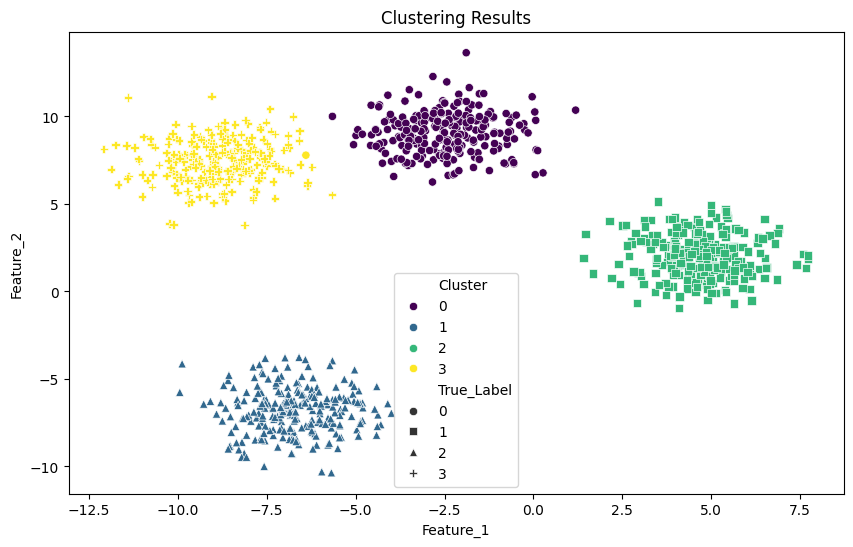

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Feature_1', y='Feature_2', hue='Cluster', data=df,
    palette='viridis', style='True_Label', markers=['o', 's', '^', 'P']
)
plt.title('Clustering Results')
plt.legend(loc='best')
plt.show()

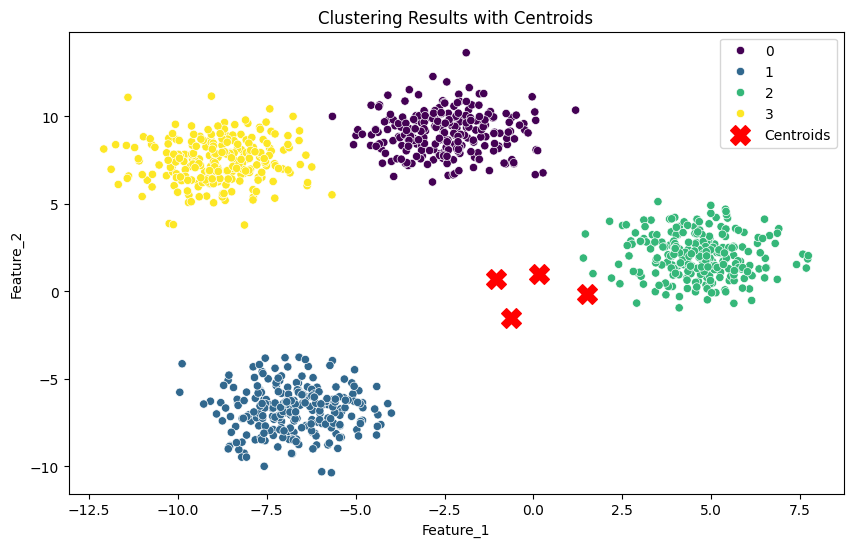

In [8]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Feature_1', y='Feature_2', hue='Cluster', data=df, palette='viridis'
)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Clustering Results with Centroids')
plt.legend(loc='best')
plt.show()

In [9]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.76
